In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [11]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [13]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [161]:
# Calculate the date 1 year ago from the last data point in the database
last12months = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date.between('2016-09-01','2017-08-31')).\
order_by(Measurement.date.asc()).all()
last12months

[('2016-09-01', 0.0),
 ('2016-09-01', 0.0),
 ('2016-09-01', 0.0),
 ('2016-09-01', None),
 ('2016-09-01', 0.02),
 ('2016-09-01', 0.01),
 ('2016-09-02', 0.0),
 ('2016-09-02', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-02', None),
 ('2016-09-02', None),
 ('2016-09-02', 0.01),
 ('2016-09-02', 0.03),
 ('2016-09-03', 0.0),
 ('2016-09-03', 0.07),
 ('2016-09-03', 0.08),
 ('2016-09-03', 0.12),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.03),
 ('2016-09-04', 0.03),
 ('2016-09-04', 0.74),
 ('2016-09-04', 0.14),
 ('2016-09-04', 0.44),
 ('2016-09-05', None),
 ('2016-09-05', 0.11),
 ('2016-09-05', None),
 ('2016-09-05', 0.02),
 ('2016-09-05', 0.03),
 ('2016-09-05', 0.18),
 ('2016-09-06', None),
 ('2016-09-06', 0.05),
 ('2016-09-06', 0.04),
 ('2016-09-06', 0.03),
 ('2016-09-06', 0.11),
 ('2016-09-06', 1.0),
 ('2016-09-07', 0.05),
 ('2016-09-07', 0.1),
 ('2016-09-07', 0.23),
 ('2016-09-07', 0.11),
 ('2016-09-07', 0.16),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.0),
 ('2016-09-08', 0.22),
 ('2016-09-08', 0.01

# Precipitation Analysis

In [83]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# unpack the tuple with dataframe

df = pd.DataFrame(last12months[:], columns = ['date','prcp'])
df.rename(columns={'prcp':'precipitation'}, inplace=True)
df.set_index('date', inplace=True)
df.head(10)

,precipitation
date,
2016-09-01,0.00
2016-09-01,0.00
2016-09-01,0.00
2016-09-01,NaN
2016-09-01,0.02
2016-09-01,0.01
2016-09-02,0.00
2016-09-02,0.02
2016-09-02,0.19


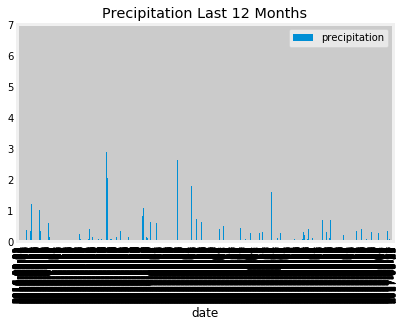

In [74]:
# Use Pandas Plotting with Matplotlib to plot the data
df.iloc[:].plot.bar(title='Precipitation Last 12 Months', legend=True)
plt.show()

In [75]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,precipitation
count,1968.000000
mean,0.171479
std,0.451817
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [121]:
# Design a query to show how many stations are available in this dataset?
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [111]:
# Design a query to show how many stations are available in this dataset?
totalStations = session.query(func.count(Station.station)).all()
totalStations

[(9)]

In [140]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

activeStations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

activeStations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [158]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
peaksTemp = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()
peaksTemp

[(54.0, 85.0, 71.66378066378067)]

In [172]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last12monthsTemp = session.query(Measurement.station, func.count(Measurement.tobs)).\
filter(Measurement.date.between('2016-09-01','2017-08-31')).\
group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).all()
last12monthsTemp

[('USC00519397', 352),
 ('USC00519281', 343),
 ('USC00516128', 341),
 ('USC00513117', 334),
 ('USC00519523', 328),
 ('USC00514830', 297),
 ('USC00517948', 176)]

In [178]:
highestObsStation = session.query(Measurement.station, Measurement.tobs).\
filter(Measurement.date.between('2016-09-01','2017-08-31')).\
filter(Measurement.station == 'USC00519397').\
order_by(Measurement.tobs.desc()).all()
highestObsStation

[('USC00519397', 87.0),
 ('USC00519397', 83.0),
 ('USC00519397', 82.0),
 ('USC00519397', 82.0),
 ('USC00519397', 82.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397',

In [182]:
tempDF = pd.DataFrame(highestObsStation[:], columns=['station','temp'])
tempDF.head(10)

,station,temp
0,USC00519397,87.0
1,USC00519397,83.0
2,USC00519397,82.0
3,USC00519397,82.0
4,USC00519397,82.0
5,USC00519397,81.0
6,USC00519397,81.0
7,USC00519397,81.0
8,USC00519397,81.0
9,USC00519397,81.0


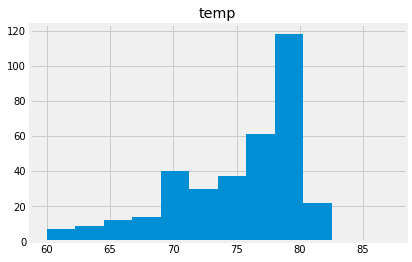

In [186]:
histogram = tempDF.hist(bins = 12)